## Regression: StatLib California Housing Data
http://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html

** Dataset Information: **

This dataset contained 20,640 observations of information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area.

** Attribute Information: (6 features and 1 target)**

- housing Median Age
- total Rooms 
- total Bedrooms 
- population
- households
- median Income
- median House Value
 
** Objective of this project **

predict value of house based on the other features

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Load Data
df = pd.read_csv('cal_housing_clean.csv')

In [3]:
# Inspect Data
df.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [4]:
df.shape

(20640, 7)

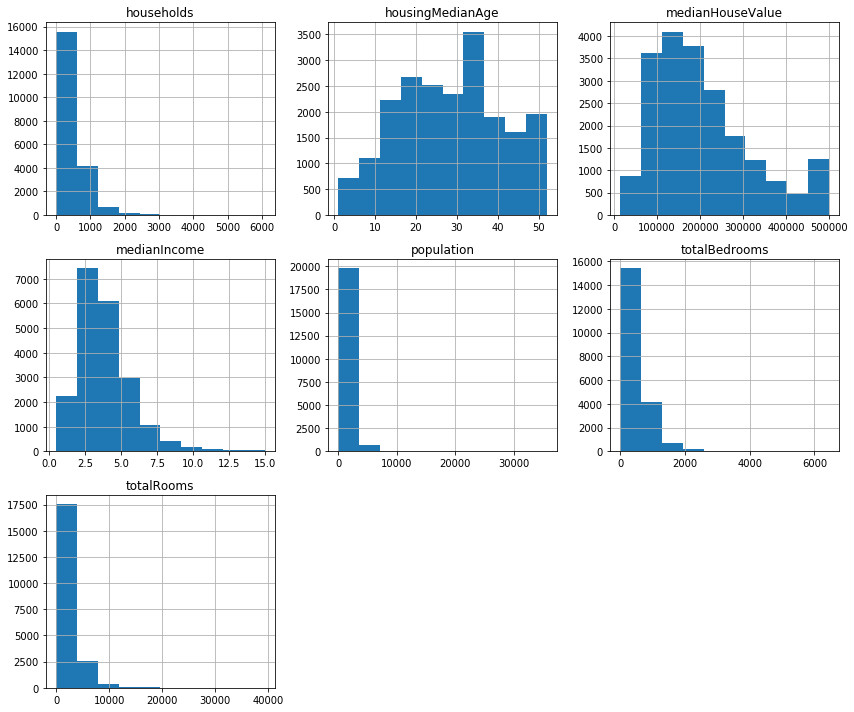

In [5]:
_ = df.hist(figsize=(12,10))
plt.tight_layout()

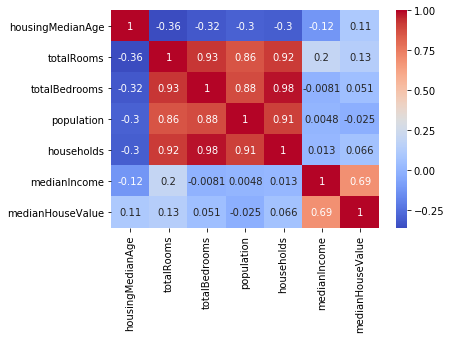

In [6]:
#plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
housingMedianAge    20640 non-null float64
totalRooms          20640 non-null float64
totalBedrooms       20640 non-null float64
population          20640 non-null float64
households          20640 non-null float64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null float64
dtypes: float64(7)
memory usage: 1.1 MB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
housingMedianAge,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
totalRooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
totalBedrooms,20640.0,537.898014,421.247906,1.0000,295.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
medianIncome,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
medianHouseValue,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [10]:
df.isnull().any()

housingMedianAge    False
totalRooms          False
totalBedrooms       False
population          False
households          False
medianIncome        False
medianHouseValue    False
dtype: bool

## Data preprocessing

** Split Features & Class (or target) **

In [16]:
X = df.drop('medianHouseValue', axis=1).values
y = df['medianHouseValue'].values
print(X.shape,y.shape)

(20640, 6) (20640,)


** Split Train Test Sets **

In [17]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 6) (4128, 6) (16512,) (4128,)


** Scale Features **

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = sc_y.transform(y_test.reshape(-1, 1)).ravel()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 6) (4128, 6) (16512,) (4128,)


## Baseline Models

In [20]:
# Import libraries
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [21]:
models = []
#linear
models.append(('LR', LinearRegression()))
models.append(('RG', Ridge(random_state=seed)))
models.append(('LS', Lasso(random_state=seed)))
#non-linear
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor(random_state=seed)))
models.append(('SVM', SVR()))
#ensemble
models.append(('RF', RandomForestRegressor(n_estimators=100,random_state=seed)))
models.append(('XGB', XGBRegressor(random_state=seed)))

Model	MSE: mean (std)
LR	-0.428 (0.005)
RG	-0.428 (0.005)
LS	-1.000 (0.002)
KNN	-0.388 (0.010)
DT	-0.641 (0.012)
SVM	-0.321 (0.003)
RF	-0.341 (0.007)
XGB	-0.355 (0.010)


Text(0,0.5,'MSE')

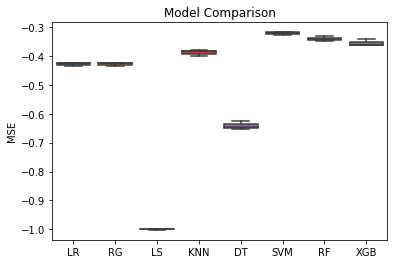

In [22]:
# cross validation
np.random.seed(seed)
kfold = KFold(n_splits=3, random_state=seed)
scoring='neg_mean_squared_error'
names = []
results = []
print('Model\tMSE: mean (std)')
for name,model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)  
    results.append(cv_results)
    names.append(name)    
    print('{}\t{:0.3f} ({:0.3f})'.format(name, cv_results.mean(), cv_results.std()))

# visualize results
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.title('Model Comparison')
plt.ylabel('MSE')

## Parameter Tuning
Top 4 algorithms: SVM, RF, XGB, KNN

In [23]:
# define functions for grid search
def default_model_perfomance(model):
    cv = cross_val_score(model, X_train, y_train,cv=kfold, scoring=scoring)
    print(model.get_params())
    print('\nMSE of train set: {:0.3f} ({:0.3f})'.format(cv.mean(), cv.std()))

def best_model_performance(model,param_grid):
    # grid search
    np.random.seed(seed)
    scoring='neg_mean_squared_error'
    kfold = KFold(n_splits=3, random_state=seed)
    grid_search = GridSearchCV(model, param_grid=param_grid,cv=kfold, verbose=1, scoring=scoring)
    grid_result = grid_search.fit(X_train,y_train)

    # results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%.3f (%.3f) with: %r" % (mean, stdev, param))

    # best
    print("\nBest MSE of train set: {:0.3f} using {}".format(grid_result.best_score_,grid_result.best_params_))

#### Model 1: SVM

In [24]:
# Default
model = SVR()
default_model_perfomance(model)

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

MSE of train set: -0.321 (0.003)


In [25]:
# Grid Search
model = SVR(kernel='rbf', gamma='auto')
C = [50,40,30]#,100,80,60,50,40,30,20,10,1,0.1]
param_grid = dict(C=C)
best_model_performance(model,param_grid)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.7min finished


-0.316 (0.004) with: {'C': 50}
-0.316 (0.003) with: {'C': 40}
-0.316 (0.003) with: {'C': 30}

Best MSE of train set: -0.316 using {'C': 30}


#### Model 2: RandomForest

In [26]:
# Default
model = RandomForestRegressor(n_estimators=100,random_state=seed)
default_model_perfomance(model)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}

MSE of train set: -0.341 (0.007)


In [27]:
# Grid Search
model = RandomForestRegressor(random_state=seed)
n_estimators = [100,200,300]
#max_depth = [10,20,30]
#max_leaf_nodes = [10,20,30]
param_grid = dict(n_estimators=n_estimators)#max_leaf_nodes=max_leaf_nodes,max_depth=max_depth)
best_model_performance(model,param_grid)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.7min finished


-0.341 (0.007) with: {'n_estimators': 100}
-0.340 (0.007) with: {'n_estimators': 200}
-0.339 (0.006) with: {'n_estimators': 300}

Best MSE of train set: -0.339 using {'n_estimators': 300}


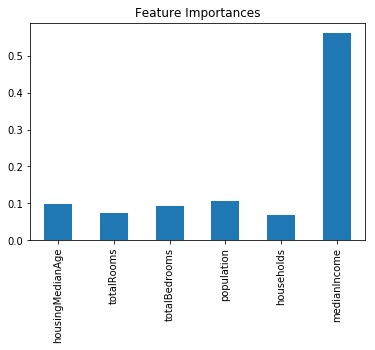

In [28]:
# Feature Importance
model = RandomForestRegressor(n_estimators=300,random_state=seed)
model.fit(X_train, y_train)
pd.DataFrame(data=model.feature_importances_,
             index=df.drop('medianHouseValue',axis=1).columns).plot(kind='bar',legend=False,
                                                        title='Feature Importances')

#### Model 3: XGBoost

In [29]:
# Default
model = XGBRegressor(n_estimators=100,random_state=seed)
default_model_perfomance(model)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 101, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}

MSE of train set: -0.355 (0.010)


In [30]:
# Grid Search
model = XGBRegressor(random_state=seed)
n_estimators = [500]#[100,500,1000]
learning_rate = [0.1]#[0.3,0.1,0.05]
max_depth = [3]#,5,7]
gamma = [0,0.1,0.2]
param_grid = dict(learning_rate=learning_rate,n_estimators=n_estimators, 
                  max_depth=max_depth,gamma=gamma)
best_model_performance(model,param_grid)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   18.2s finished


-0.328 (0.005) with: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
-0.327 (0.006) with: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
-0.328 (0.006) with: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

Best MSE of train set: -0.327 using {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


[ 0.1072153   0.18574326  0.1773399   0.19095914  0.14082874  0.19791365]


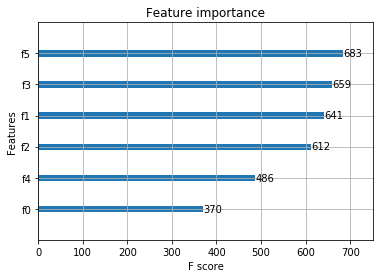

In [31]:
# Feature Importance
from xgboost import plot_importance  
model = XGBRegressor(n_estimators=500, gamma=0.1,learning_rate=0.1,random_state=seed)                      
model.fit(X_train,y_train)
print(model.feature_importances_)
plot_importance(model)

#### Model 4: KNN

In [32]:
# Default
model = KNeighborsRegressor()
default_model_perfomance(model)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

MSE of train set: -0.388 (0.010)


In [33]:
# Grid Search
model = KNeighborsRegressor()
n_neighbors = [11,13,15,17,19]#3,5,7,9]
param_grid = dict(n_neighbors=n_neighbors)
best_model_performance(model,param_grid)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
-0.364 (0.006) with: {'n_neighbors': 11}
-0.363 (0.006) with: {'n_neighbors': 13}
-0.362 (0.006) with: {'n_neighbors': 15}
-0.361 (0.008) with: {'n_neighbors': 17}
-0.362 (0.007) with: {'n_neighbors': 19}

Best MSE of train set: -0.361 using {'n_neighbors': 17}


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.3s finished


## Final Model: SVM

#### params: C=30

In [34]:
model = SVR(kernel='rbf', C=30)
model.fit(X_train, y_train)
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))

MSE of train set: 0.290
R^2 of train set: 0.710


** Save and load the final model **

In [35]:
#save model to disk
import pickle
filename='model.sav'
pickle.dump(model, open(filename, 'wb'))

In [41]:
#load the model from disk
model = pickle.load(open(filename,'rb'))
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))

MSE of train set: 0.290
R^2 of train set: 0.710


## Model Evaluation with Test set

In [36]:
# predict class with test set (new, unseen)
y_pred = model.predict(X_test)
print('MSE of test set: {:0.3f}'.format(mean_squared_error(y_test,model.predict(X_test))))
print('R^2 of test set: {:0.3f}'.format(r2_score(y_test,model.predict(X_test))))

MSE of test set: 0.336
R^2 of test set: 0.670


In [46]:
# to orininal scale 
print('MSE of test set: {:0.3f}'
      .format(mean_squared_error(sc_y.inverse_transform(y_test),
                                 sc_y.inverse_transform(model.predict(X_test)))))
print('R^2 of test set: {:0.3f}'.format(r2_score(y_test,model.predict(X_test))))

MSE of test set: 4458171092.989
R^2 of test set: 0.670


(0, 620000)

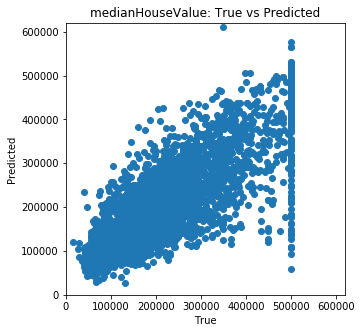

In [41]:
plt.figure(figsize=(5,5))
plt.scatter(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_pred))
plt.title('medianHouseValue: True vs Predicted')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.xlim([0,620000])
plt.ylim([0,620000])

(0, 600)

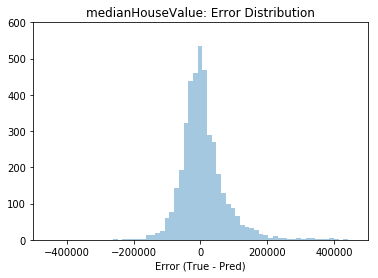

In [42]:
sns.distplot((sc_y.inverse_transform(y_test)-sc_y.inverse_transform(y_pred)), bins=50, kde=False, axlabel='Error (True - Pred)')
plt.title('medianHouseValue: Error Distribution')
plt.xlim([-500000,500000])
plt.ylim([0,600])

## Summary

- Best model: ** SVM ** w/ param: C=30


- MSE / RMSE / R2 of test set: ** 0.336 / 0.579 / 0.670 **